### load data

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
coverage_0 = np.load('npy_data/ESE/pos_scan/dim_4_posdef_0/dr/coverage/coverage_sigma_0_181209.npy')
coverage_02 = np.load('npy_data/ESE/pos_scan/dim_4_posdef_0/dr/coverage/coverage_0_2mm_np2_5_20181125.npy')
coverage_23 = np.load('npy_data/ESE/pos_scan/dim_4_posdef_0/dr/coverage/coverage_sigma_200_300_181207.npy')
coverage_310 = np.load('npy_data/ESE/pos_scan/dim_4_posdef_0/dr/coverage/coverage_sigma_300_1000_181208.npy')

0.098125

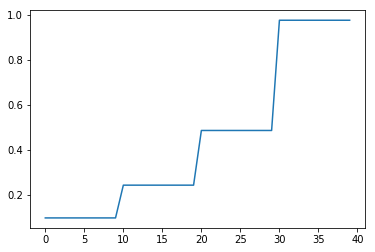

In [50]:
plt.plot(coverage_0)

In [52]:
print('np5 with sigma = 0 : {}'.format(coverage_0[30]))
print('np4 with sigma = 0 : {}'.format(coverage_0[20]))
print('np3 with sigma = 0 : {}'.format(coverage_0[10]))
print('np2 with sigma = 0 : {}'.format(coverage_0[0]))

np5 with sigma = 0 : 0.976875
np4 with sigma = 0 : 0.486875
np3 with sigma = 0 : 0.24375
np2 with sigma = 0 : 0.098125


0.24375

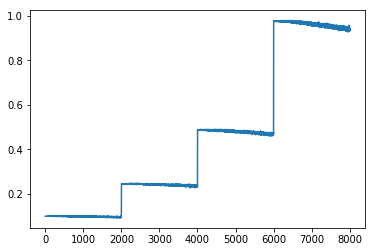

In [19]:
plt.plot(coverage_02)
coverage_02[2000]

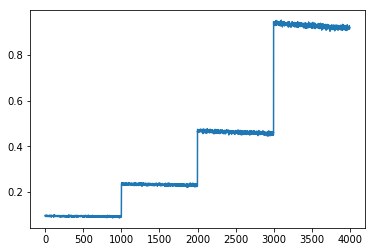

In [5]:
plt.plot(coverage_23)

In [7]:
coverage_23.max()

0.951875

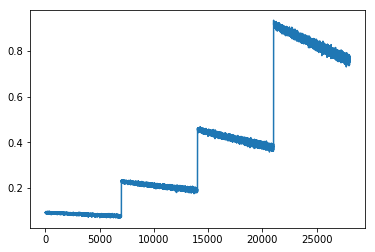

In [6]:
plt.plot(coverage_310)

In [7]:
coverage181125[-1]

0.941875

In [8]:
np.where(coverage_310 <= 0.1)

(array([   0,    1,    2, ..., 7007, 7008, 7009]),)

--> sigma = 300...1000 -> total : 7010

In [24]:
print('Max1 : {}'.format(coverage181123_34.max()))
print('Max2 : {}'.format(coverage181123_310.max()))
print('End1 : {}'.format(coverage181123_34[-1]))
print('End2 : {}'.format(coverage181123_310[249]))

Max1 : 0.928125
Max2 : 0.928125
End1 : 0.895
End2 : 0.90875


In [11]:
np.where(np.logical_and(coverage181123_310 < 0.4, coverage181123_310 > 0.1))

(array([ 80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
         93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105,
        106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
        119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131,
        132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144,
        145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157,
        158, 159, 210, 211, 213, 214, 215, 216, 217, 219, 220, 221, 222,
        223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235,
        236, 237, 238, 239]),)

### Coverage

sigma = 0...2 with coverage_02 = 2000 / Np 
--> dsigma = 0.01mm, Nsample = 10

sigma = 2...3 with coverage_23 = 1000 / Np
--> dsigma = 0.01mm, Nsample = 10

sigma = 3... 10 with coverage_310 = 7010 / Np
--> dsigma = 0.01mm, Nsample = 10

In [15]:
sigma_range = np.around(np.arange(0, 10.001, 0.01),2)
len(sigma_range)

1001

In [29]:
# sigma range setting
Nsample = 10
# 0...2
sigma_1 = np.arange(0, 2, 0.01)
len1 = len(sigma_1)* Nsample
# 2...3 
sigma_2 = np.arange(2, 3, 0.01)
len2 = len(sigma_2)* Nsample
# 3...10
sigma_3 = np.arange(3, 10.001, 0.01)
len3 = len(sigma_3)* Nsample

sigma_range = np.around(np.arange(0, 10.001, 0.01),2)

cov_all = np.zeros((len(sigma_range)* Nsample, 4))

for idx in range(cov_all.shape[1]):
    # sigma = 0...2  
    start1 = idx* len1
    arr1 = np.array(coverage_02[start1 : (start1 + len1)])
    # sigma = 2...3
    start2 = idx* len2
    arr2 = np.array(coverage_23[start2 : (start2 + len2)])
    # sigma = 4...10 -> first Nsamples should be eliminated!
    start3 = idx* len3
    arr3 = np.array(coverage_310[start3 : (start3 + len3)])
    # concatenate
    curr_cov = np.concatenate((arr1, arr2, arr3))
    cov_all[:, idx] = np.array(curr_cov)
    
cov_np2_all = np.array(cov_all[:, 0])
cov_np3_all = np.array(cov_all[:, 1])
cov_np4_all = np.array(cov_all[:, 2])
cov_np5_all = np.array(cov_all[:, 3])

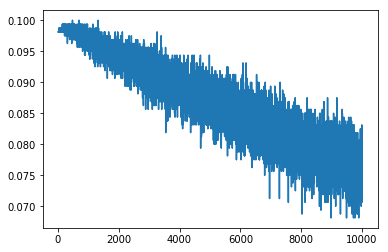

In [30]:
plt.plot(cov_np2_all)

In [32]:
# mean coverage
def mean_coverage(arr_cov, Nsample):
    arr = np.array(arr_cov)
    Nsigma = int(len(arr)/Nsample)
    arr_mean = np.zeros(Nsigma)
    for idx in range(Nsigma):
        start = idx* Nsample
        mean = np.mean(arr[start : (start + Nsample)])
        arr_mean[idx] = mean
    return arr_mean

In [33]:
cov_np2_mean = mean_coverage(cov_np2_all, Nsample)
cov_np2 = np.stack((sigma_range, cov_np2_mean), axis = 1)

cov_np3_mean = mean_coverage(cov_np3_all, Nsample)
cov_np3 = np.stack((sigma_range, cov_np3_mean), axis = 1)

cov_np4_mean = mean_coverage(cov_np4_all, Nsample)
cov_np4 = np.stack((sigma_range, cov_np4_mean), axis = 1)

cov_np5_mean = mean_coverage(cov_np5_all, Nsample)
cov_np5 = np.stack((sigma_range, cov_np5_mean), axis = 1)

1001


In [35]:
# setup the coverage all for saving as npy with the corresponding sigma values
sigma_range_Nsample = np.repeat(sigma_range, Nsample)
cov_np2_all_tosave = np.stack((sigma_range_Nsample, cov_np2_all), axis = 1)
cov_np3_all_tosave = np.stack((sigma_range_Nsample, cov_np3_all), axis = 1)
cov_np4_all_tosave = np.stack((sigma_range_Nsample, cov_np4_all), axis = 1)
cov_np5_all_tosave = np.stack((sigma_range_Nsample, cov_np5_all), axis = 1)

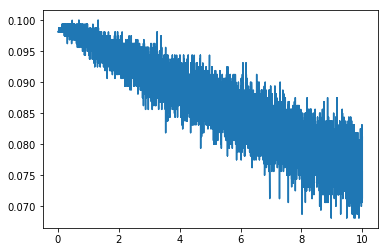

In [36]:
plt.plot(cov_np2_all_tosave[:, 0], cov_np2_all_tosave[:, 1])

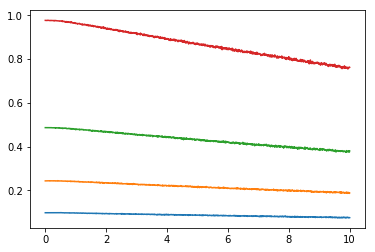

In [34]:
plt.plot(cov_np2[:, 0], cov_np2[:, 1])
plt.plot(cov_np2[:, 0], cov_np3[:, 1])
plt.plot(cov_np2[:, 0], cov_np4[:, 1])
plt.plot(cov_np2[:, 0], cov_np5[:, 1])
#plt.legend(['160', '400', '800', '1600'])

save coverages as npy data

In [37]:
fpath = 'npy_data/ESE/pos_scan/dim_4_posdef_0/dr/coverage'
# np2
np.save('{}/coverage_np2_all.npy'.format(fpath), cov_np2_all_tosave)
np.save('{}/coverage_np2_mean.npy'.format(fpath), cov_np2)

# np3
np.save('{}/coverage_np3_all.npy'.format(fpath), cov_np3_all_tosave)
np.save('{}/coverage_np3_mean.npy'.format(fpath), cov_np3)

# np4
np.save('{}/coverage_np4_all.npy'.format(fpath), cov_np4_all_tosave)
np.save('{}/coverage_np4_mean.npy'.format(fpath), cov_np4)

# np5
np.save('{}/coverage_np5_all.npy'.format(fpath), cov_np5_all_tosave)
np.save('{}/coverage_np5_mean.npy'.format(fpath), cov_np5)

## 1D visualization

In [38]:
import tools.tex_1D_visualization as vis

In [47]:
# settings
fname_json = 'tools/TUI_FRI_colors.json'
colors = ['TUI_blue_dark', 'TUI_orange_dark', 'FRI_green', 'TUI_red_dark']
mark = ['', '', '', '']
xlabel = 'Sigma[mm]'
ylabel = 'Coverage [\%]'
#fname_tex_all = 'tex_file/coverage_all_np.tex'

In [48]:
xvalues = cov_np4[:, 0]

In [49]:
# np2 
vis.generate_tex_file_with_1D_plot(xvalues, fname_json, ['TUI_red_dark'], [''], xlabel, ylabel, 
                                   'tex_file/coverage_np2.tex', 100*cov_np2[:, 1])
# np3 
vis.generate_tex_file_with_1D_plot(xvalues, fname_json, ['FRI_green'], [''], xlabel, ylabel, 
                                   'tex_file/coverage_np3.tex', 100*cov_np3[:, 1])
# np4 
vis.generate_tex_file_with_1D_plot(xvalues, fname_json, ['TUI_orange_dark'], [''], xlabel, ylabel, 
                                   'tex_file/coverage_np4.tex', 100*cov_np4[:, 1])
# np5 
vis.generate_tex_file_with_1D_plot(xvalues, fname_json, ['TUI_blue_dark'], [''], xlabel, ylabel, 
                                   'tex_file/coverage_np5.tex', 100*cov_np5[:, 1])

In [80]:
print('np5 coveerage at sigma = 0mm : {}'.format(cov_np5[0, 1]))
print('np5 coveerage at sigma = 2mm : {}'.format(cov_np5[200, 1]))
print('np4 coveerage at sigma = 0mm : {}'.format(cov_np4[0, 1]))
print('np4 coveerage at sigma = 2mm : {}'.format(cov_np4[200, 1]))
print('np3 coveerage at sigma = 0mm : {}'.format(cov_np3[0, 1]))
print('np3 coveerage at sigma = 2mm : {}'.format(cov_np3[200, 1]))
print('np2 coveerage at sigma = 0mm : {}'.format(cov_np2[0, 1]))
print('np2 coveerage at sigma = 2mm : {}'.format(cov_np2[200, 1]))

np5 coveerage at sigma = 0mm : 0.97675
np5 coveerage at sigma = 2mm : 0.939625
np4 coveerage at sigma = 0mm : 0.4868125000000001
np4 coveerage at sigma = 2mm : 0.46762499999999996
np3 coveerage at sigma = 0mm : 0.24362499999999998
np3 coveerage at sigma = 2mm : 0.23493749999999997
np2 coveerage at sigma = 0mm : 0.098125
np2 coveerage at sigma = 2mm : 0.0943125
